In [1]:
import sys
sys.path.append('../SVM')
sys.path.insert(0, '../utilities')
import pandas as pd  
import numpy as np  
import SVM_1
from sklearn import preprocessing

#load data
from data_reader import load_data
fname = "../data/20171101_RAW_export.xyz"
df = load_data(fname)
dbdt = df.loc[:,'DBDT_Ch2GT8':'DBDT_Ch2GT20'].values
lbl = df.loc[:,'DBDT_INUSE_Ch2GT14'].values

#normalize (min max)
print("Min-max norm:")
X_minmax = (dbdt - np.amin(dbdt)) / (np.amax(dbdt) - np.amin(dbdt))
SVM_1.SVM_classify(X_minmax,lbl)
print("")

#standardize (z-score)
dbdt_scaler = preprocessing.StandardScaler().fit(dbdt)
dbdt_std = dbdt_scaler.transform(dbdt)
X_std = dbdt_std
print("z score norm:")
SVM_1.SVM_classify(X_std,lbl)
print("")

#standardize (z-score) and using difference
import difference
diff = difference.row_diff(dbdt)
dbdt_diff = np.concatenate((dbdt, diff), axis = 1)
dbdt_scaler = preprocessing.StandardScaler().fit(dbdt_diff)
dbdt_std = dbdt_scaler.transform(dbdt_diff)
X_std = dbdt_std
print("z score norm using diff:")
SVM_1.SVM_classify(X_std,lbl)

Min-max norm:
[[147  54]
 [504 947]]
              precision    recall  f1-score   support

           0       0.23      0.73      0.35       201
           1       0.95      0.65      0.77      1451

   micro avg       0.66      0.66      0.66      1652
   macro avg       0.59      0.69      0.56      1652
weighted avg       0.86      0.66      0.72      1652

[1 1 1 ... 1 1 1]
[1 0 0 ... 1 1 1]
0.8819040628396028

z score norm:
[[164  34]
 [474 980]]
              precision    recall  f1-score   support

           0       0.26      0.83      0.39       198
           1       0.97      0.67      0.79      1454

   micro avg       0.69      0.69      0.69      1652
   macro avg       0.61      0.75      0.59      1652
weighted avg       0.88      0.69      0.75      1652

[1 1 0 ... 1 1 1]
[1 0 0 ... 1 0 1]
0.8926826943242265

z score norm using diff:
[[158  42]
 [466 986]]
              precision    recall  f1-score   support

           0       0.25      0.79      0.38       200
   

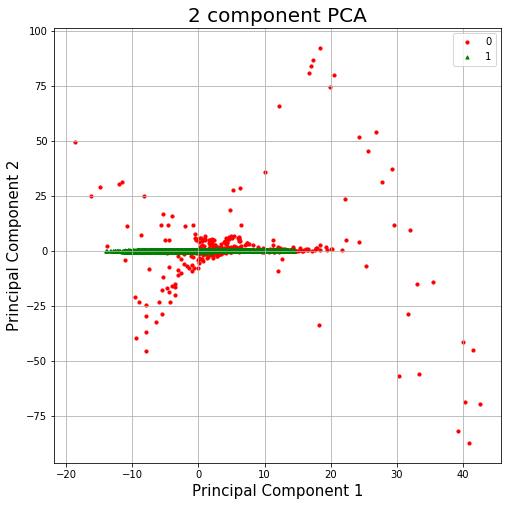

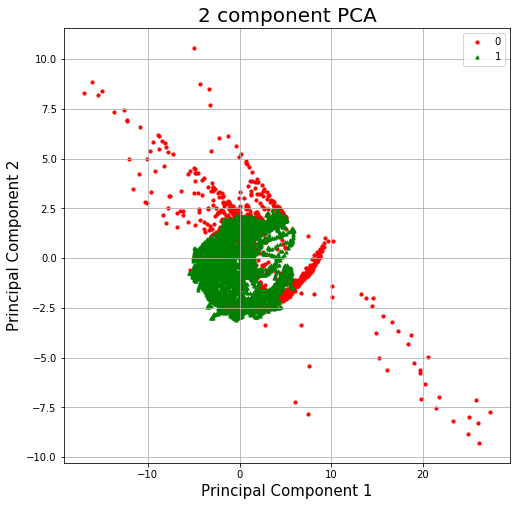

In [2]:
import PC_anal
PC_anal.PCA_custom(diff, lbl)
PC_anal.PCA_custom(dbdt, lbl)

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# split
X = dbdt
X_train, X_test, lbl_train, lbl_test = train_test_split(X, lbl, test_size = 0.20)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

# Make classification
classifier = RandomForestClassifier(n_estimators=1000)  
classifier.fit(X_train, lbl_train)  
lbl_pred = classifier.predict(X_test)

#metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(lbl_test,lbl_pred))  
print(classification_report(lbl_test,lbl_pred))
print(lbl_test)
print(lbl_pred)
scores = cross_val_score(classifier, X, lbl, cv=5)
print(scores.mean())


[[ 150   63]
 [  14 1425]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.80       213
           1       0.96      0.99      0.97      1439

   micro avg       0.95      0.95      0.95      1652
   macro avg       0.94      0.85      0.88      1652
weighted avg       0.95      0.95      0.95      1652

[0 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
0.8926848208511095
